In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path # working with paths
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Setting data paths with pathlib
data_path = Path('/home/mai22042/otto/data')
test_path = data_path/'test.jsonl'
test_path = data_path/'test.jsonl'
sample_sub_path = Path('sample_submission.csv')

In [3]:
# https://www.kaggle.com/code/columbia2131/otto-read-a-chunk-of-jsonl-to-manageable-df/
test_set = pd.DataFrame()
chunks = pd.read_json(data_path / 'test.jsonl', lines=True, chunksize=100_000)

for e, chunk in enumerate(chunks):
    event_dict = {
        'session': [],
        'aid': [],
        'ts': [],
        'type': [],
    }

    # test_set = pd.concat([test_set, chunk])
    for session, events in zip(chunk['session'].tolist(), chunk['events'].tolist()):
        for event in events:
            event_dict['session'].append(session)
            event_dict['aid'].append(event['aid'])
            event_dict['ts'].append(event['ts'])
            event_dict['type'].append(event['type'])
    chunk_session = pd.DataFrame(event_dict)
    test_set = pd.concat([test_set, chunk_session])

        
test_set = test_set.reset_index(drop=True)

In [4]:
display(test_set)

,session,aid,ts,type
0,12899779,59625,1661724000278,clicks
1,12899780,1142000,1661724000378,clicks
2,12899780,582732,1661724058352,clicks
3,12899780,973453,1661724109199,clicks
4,12899780,736515,1661724136868,clicks
...,...,...,...,...
6928118,14571577,1141710,1662328774770,clicks
6928119,14571578,519105,1662328775009,clicks
6928120,14571579,739876,1662328775605,clicks
6928121,14571580,202353,1662328781067,clicks


In [5]:
test_set.rename(index=str, columns={'session': 'session_id',
                              'aid' : 'product_id',
                              'ts' : 'time_stamp',
                              'type' : 'event_type'}, inplace=True)

In [6]:
test_set.head(20)

,session_id,product_id,time_stamp,event_type
0,12899779,59625,1661724000278,clicks
1,12899780,1142000,1661724000378,clicks
2,12899780,582732,1661724058352,clicks
3,12899780,973453,1661724109199,clicks
4,12899780,736515,1661724136868,clicks
5,12899780,1142000,1661724155248,clicks
6,12899781,141736,1661724000559,clicks
7,12899781,199008,1661724022851,clicks
8,12899781,57315,1661724170835,clicks
9,12899781,194067,1661724246188,clicks


In [7]:
test_set['date'] = pd.to_datetime(test_set['time_stamp'], unit='ms')
test_set.head(20)

,session_id,product_id,time_stamp,event_type,date
0,12899779,59625,1661724000278,clicks,2022-08-28 22:00:00.278
1,12899780,1142000,1661724000378,clicks,2022-08-28 22:00:00.378
2,12899780,582732,1661724058352,clicks,2022-08-28 22:00:58.352
3,12899780,973453,1661724109199,clicks,2022-08-28 22:01:49.199
4,12899780,736515,1661724136868,clicks,2022-08-28 22:02:16.868
5,12899780,1142000,1661724155248,clicks,2022-08-28 22:02:35.248
6,12899781,141736,1661724000559,clicks,2022-08-28 22:00:00.559
7,12899781,199008,1661724022851,clicks,2022-08-28 22:00:22.851
8,12899781,57315,1661724170835,clicks,2022-08-28 22:02:50.835
9,12899781,194067,1661724246188,clicks,2022-08-28 22:04:06.188


In [ ]:
test_set.drop('year_month', inplace=True, axis=1)

test_set.head(5)

In [10]:
test_set.insert(loc=3, column='year', value=test_set['date'].map(lambda x: x.year))

In [11]:
test_set.insert(loc=4, column='month', value=test_set['date'].map(lambda x: x.month))

In [12]:
test_set.insert(loc=5, column='day', value=test_set['date'].map(lambda x: x.day))

In [13]:
test_set.head(5)
test_set.insert(loc=7, column='day2', value=(test_set.date.dt.dayofweek)+1)


In [14]:
test_set.insert(loc=8, column='hour', value=test_set.date.dt.hour)

In [15]:
test_set.head(5)

,session_id,product_id,time_stamp,year,month,day,event_type,day2,hour,date
0,12899779,59625,1661724000278,2022,8,28,clicks,7,22,2022-08-28 22:00:00.278
1,12899780,1142000,1661724000378,2022,8,28,clicks,7,22,2022-08-28 22:00:00.378
2,12899780,582732,1661724058352,2022,8,28,clicks,7,22,2022-08-28 22:00:58.352
3,12899780,973453,1661724109199,2022,8,28,clicks,7,22,2022-08-28 22:01:49.199
4,12899780,736515,1661724136868,2022,8,28,clicks,7,22,2022-08-28 22:02:16.868


In [16]:
test_set = test_set[['session_id','product_id','event_type','time_stamp','year','month','day','day2','hour','date']]

In [17]:
test_set.head(5)

,session_id,product_id,event_type,time_stamp,year,month,day,day2,hour,date
0,12899779,59625,clicks,1661724000278,2022,8,28,7,22,2022-08-28 22:00:00.278
1,12899780,1142000,clicks,1661724000378,2022,8,28,7,22,2022-08-28 22:00:00.378
2,12899780,582732,clicks,1661724058352,2022,8,28,7,22,2022-08-28 22:00:58.352
3,12899780,973453,clicks,1661724109199,2022,8,28,7,22,2022-08-28 22:01:49.199
4,12899780,736515,clicks,1661724136868,2022,8,28,7,22,2022-08-28 22:02:16.868


In [18]:
# creating a csv from dataframe
test_set.to_csv("otto-data-test-an-last.csv", index=False)

In [3]:
test_set= pd.read_csv('/home/mai22042/otto/src/data analysis/otto-data-test-an-last.csv')

In [4]:
print(test_set.nunique())

session_id    1671803
product_id     783486
event_type          3
time_stamp    6835980
year                1
month               2
day                 8
day2                7
hour               24
date          6835980
dtype: int64


In [6]:
# which session was more active
test_sessions = test_set['session_id'].value_counts()
print(test_sessions)



14086824    458
13352358    433
13242700    421
13234219    407
13346726    406
           ... 
13675903      1
13675907      1
13675908      1
13675909      1
14571581      1
Name: session_id, Length: 1671803, dtype: int64


In [7]:
# unique products and how often they are clicked, put in cart, or bought
test_products = test_set['product_id'].value_counts()
print(test_products)
test_products.head(20)

485256     9056
1460571    8870
108125     6361
986164     4569
554660     3668
           ... 
391437        1
933573        1
1208144       1
1220801       1
1722993       1
Name: product_id, Length: 783486, dtype: int64


485256     9056
1460571    8870
108125     6361
986164     4569
554660     3668
1551213    3592
754412     3443
832192     3441
33343      3438
579690     3316
1006198    2999
688602     2975
329725     2963
29735      2936
184976     2646
1019736    2593
1022566    2560
1043508    2538
496180     2464
944778     2406
Name: product_id, dtype: int64

In [8]:
#Total number of "clicks" in test session
n_clicks = len(test_set[test_set['event_type'].map(lambda x:x == 'clicks')])
print(f'sessions[test_set] contain : {n_clicks} number of "clicks" in total')
#Total number of "carts" in test session
n_carts = len(test_set[test_set['event_type'].map(lambda x:x == 'carts')])
print(f'sessions[test_set] contain : {n_carts} number of "carts" in total')
#Total number of "orders" in test session
n_orders = len(test_set[test_set['event_type'].map(lambda x:x == 'orders')])
print(f'sessions[test_set] contain : {n_orders} number of "orders" in total')

sessions[test_set] contain : 6292632 number of "clicks" in total
sessions[test_set] contain : 570011 number of "carts" in total
sessions[test_set] contain : 65480 number of "orders" in total


In [13]:
#n_cer = len(test_set[test_set['event_type'].map(lambda x:x == type) & test_set['month'].map(lambda x:x == month)])
#print(f'sessions[test_set] contain : {n_cer} number of "clicks" in total')

In [9]:
types=['clicks','carts','orders']
months=[5,6,7,8,9]
for month in months:
    for type in types:
        #n_o_e = test_set[test_set['event_type'].map(lambda x:x == type)]
        #n_month = test_set[test_set['month'].map(lambda x:x == month)]
        n_e_p_m = len(test_set[(test_set['event_type'].map(lambda x:x == type)) & (test_set['month'].map(lambda x:x == month))])
        print(f'Durring the {month} month, {n_e_p_m} number of type "{type}" actions occured.')

Durring the 5 month, 0 number of type "clicks" actions occured.
Durring the 5 month, 0 number of type "carts" actions occured.
Durring the 5 month, 0 number of type "orders" actions occured.
Durring the 6 month, 0 number of type "clicks" actions occured.
Durring the 6 month, 0 number of type "carts" actions occured.
Durring the 6 month, 0 number of type "orders" actions occured.
Durring the 7 month, 0 number of type "clicks" actions occured.
Durring the 7 month, 0 number of type "carts" actions occured.
Durring the 7 month, 0 number of type "orders" actions occured.
Durring the 8 month, 2868445 number of type "clicks" actions occured.
Durring the 8 month, 262328 number of type "carts" actions occured.
Durring the 8 month, 35504 number of type "orders" actions occured.
Durring the 9 month, 3424187 number of type "clicks" actions occured.
Durring the 9 month, 307683 number of type "carts" actions occured.
Durring the 9 month, 29976 number of type "orders" actions occured.


In [10]:
# Which month is the busiest?
test_month = test_set['month'].value_counts()
print(test_month)

9    3761846
8    3166277
Name: month, dtype: int64


7    1097239
2    1059335
3    1044783
1    1031605
6     939317
4     921459
5     834385
Name: day2, dtype: int64


/tmp/ipykernel_1080066/4191061148.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  test_day = test_day[:10,]
/home/mai22042/miniconda3/envs/thesis/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


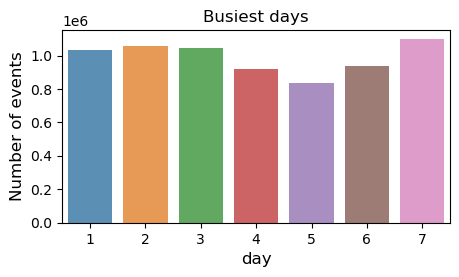

In [11]:
# Which day is the busiest?
test_day = test_set['day2'].value_counts()
print(test_day)
test_day = test_day[:10,]
plt.figure(figsize=(5,2.5))
sns.barplot(test_day.index, test_day.values, alpha=0.8)
plt.title('Busiest days')
plt.ylabel('Number of events', fontsize=12)
plt.xlabel('day', fontsize=12)
plt.show()

<AxesSubplot: xlabel='day2', ylabel='count'>

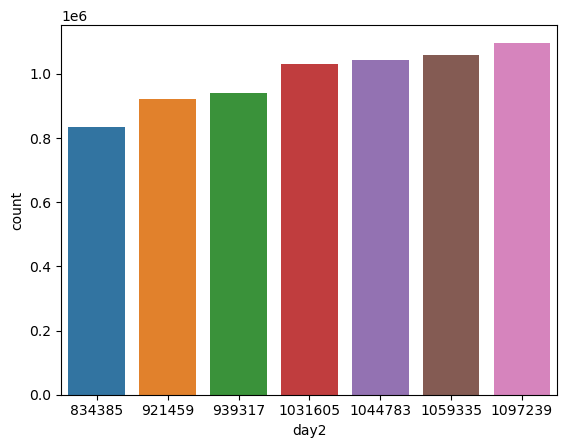

In [12]:
sns.countplot(x=test_set['day2'], data=test_day)

<AxesSubplot: xlabel='session_id', ylabel='count'>

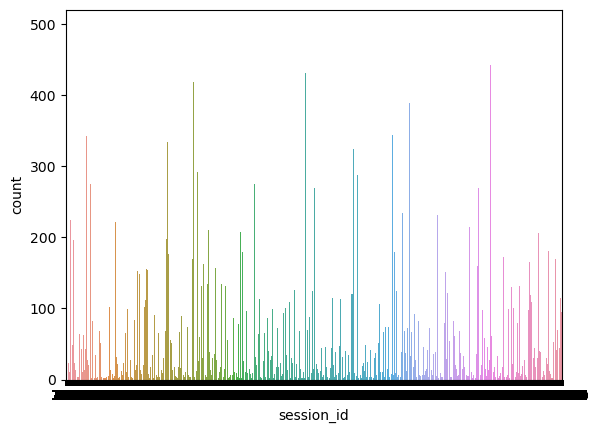

In [35]:
sns.countplot(x=test_set["session_id"])

<AxesSubplot: xlabel='event_type', ylabel='count'>

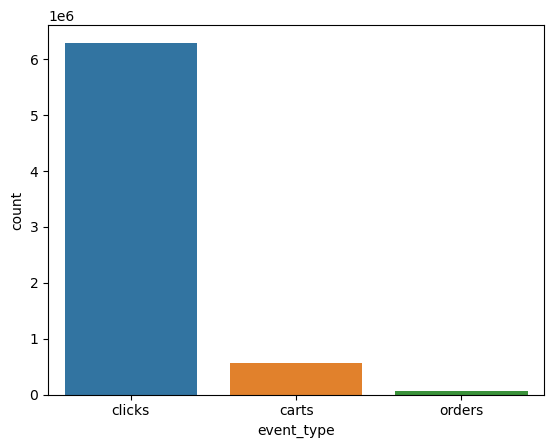

In [13]:
sns.countplot(x=test_set["event_type"])

<AxesSubplot: xlabel='product_id', ylabel='count'>

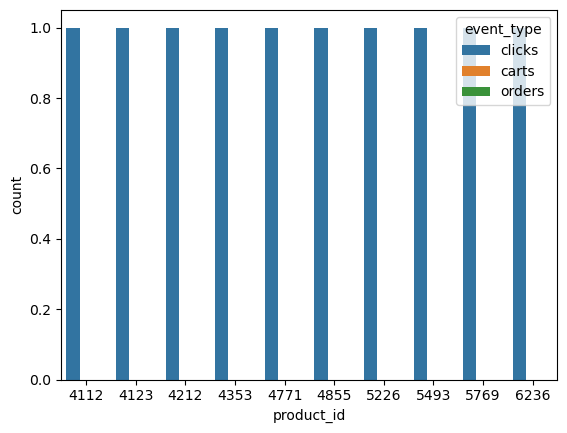

In [44]:
sns.countplot(data=test_set, x=test_products.head(10), hue="event_type")

<AxesSubplot: xlabel='event_type', ylabel='count'>

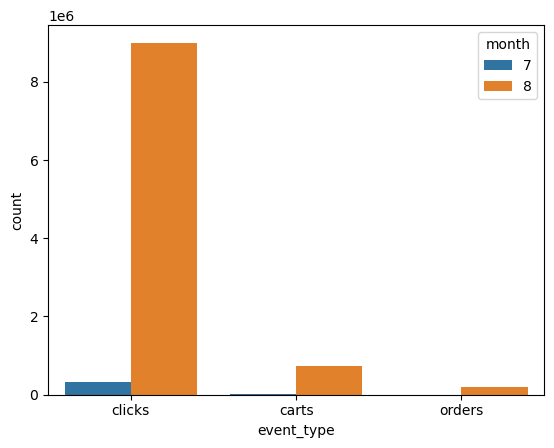

In [41]:
sns.countplot(data=test_set, x=test_set["event_type"], hue="month")